In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import hann, flattop
from numpy.fft import fft, fftshift


In [2]:
f1 = 400      
f2 = 400.25   
f3 = 399.75
A = 3         
fs = 600      
N = 3000      

k = np.arange(N)
x = A * (np.sin(2 * np.pi * f1 * k / fs) + 
         np.sin(2 * np.pi * f2 * k / fs) + 
         np.sin(2 * np.pi * f3 * k / fs))


In [3]:
w_rect = np.ones(N)
w_hann = hann(N, sym=False)
w_flattop = flattop(N, sym=False)


In [4]:
def fft2db(X):
    N = X.size
    Xtmp = 2 / N * X
    Xtmp[0] /= 2
    if N % 2 == 0:
        Xtmp[N // 2] /= 2
    return 20 * np.log10(np.abs(Xtmp))


In [5]:
X_rect = fft(x * w_rect)
X_hann = fft(x * w_hann)
X_flattop = fft(x * w_flattop)
f = np.arange(N) * fs / N


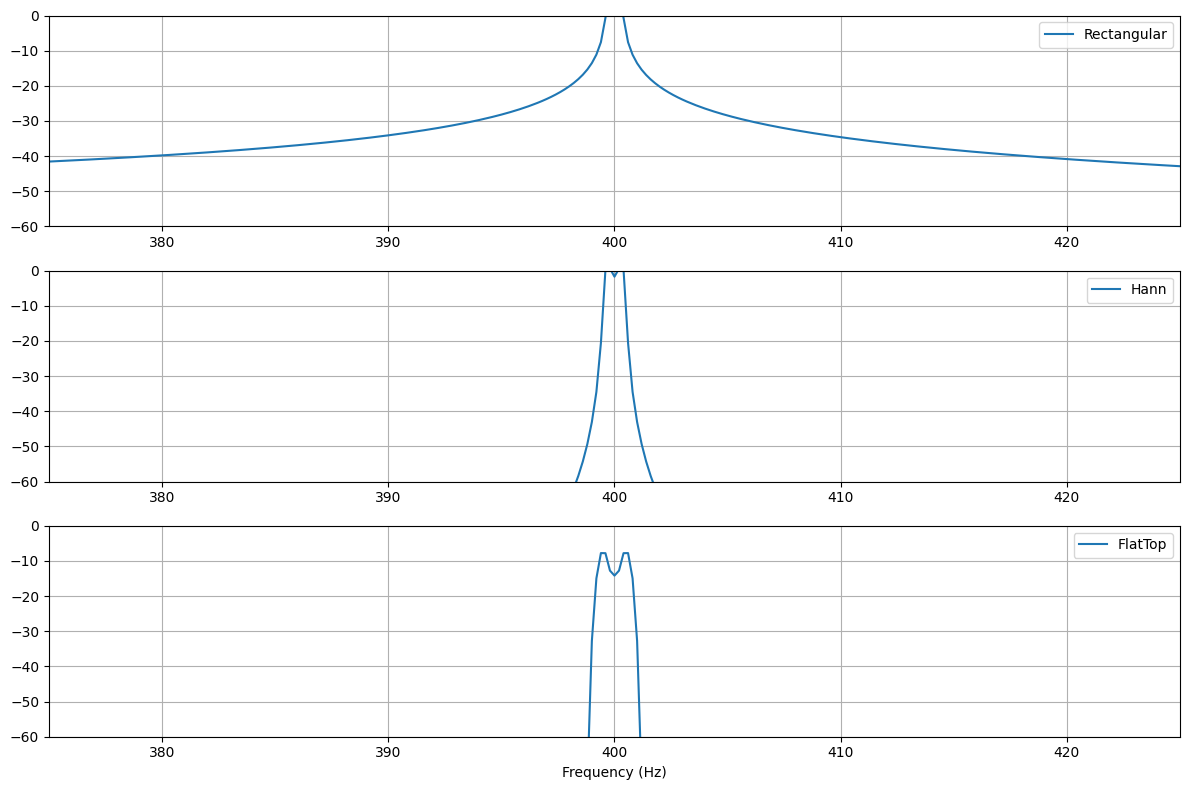

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X_rect), label="Rectangular")
plt.xlim(375, 425)
plt.ylim(-60, 0)
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X_hann), label="Hann")
plt.xlim(375, 425)
plt.ylim(-60, 0)
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X_flattop), label="FlatTop")
plt.xlim(375, 425)
plt.ylim(-60, 0)
plt.legend()
plt.grid()

plt.xlabel("Frequency (Hz)")
plt.tight_layout()
plt.show()


In [7]:
def winDTFTdB(w):
    N = w.size
    Nz = 100 * N
    W = np.zeros(Nz)
    W[:N] = w
    W = np.abs(fftshift(fft(W)))
    W /= np.max(W)
    W = 20 * np.log10(W + 1e-12)
    Omega = 2 * np.pi * np.arange(Nz) / Nz - np.pi
    return Omega, W


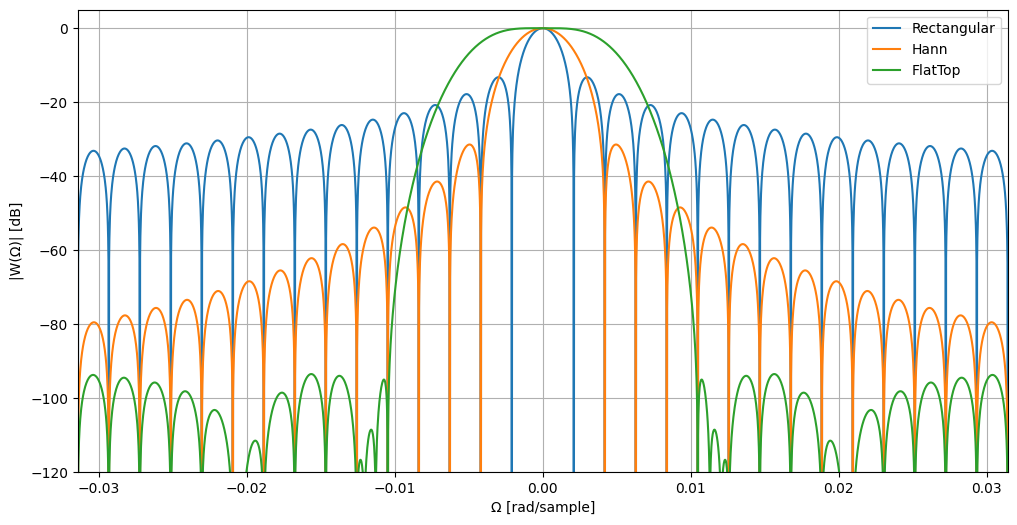

In [8]:
Omega, Wr = winDTFTdB(w_rect)
_, Wh = winDTFTdB(w_hann)
_, Wf = winDTFTdB(w_flattop)

plt.figure(figsize=(12, 6))
plt.plot(Omega, Wr, label='Rectangular')
plt.plot(Omega, Wh, label='Hann')
plt.plot(Omega, Wf, label='FlatTop')
plt.xlim(-np.pi / 100, np.pi / 100)
plt.ylim(-120, 5)
plt.xlabel('Ω [rad/sample]')
plt.ylabel('|W(Ω)| [dB]')
plt.grid()
plt.legend()
plt.show()
